In [238]:
import pandas as pd
import numpy as np

In [239]:
training=pd.read_csv('house-prices-advanced-regression-techniques/train.csv',index_col='Id')
test_x=pd.read_csv('house-prices-advanced-regression-techniques/test.csv',index_col='Id')
train_x=training.iloc[:,:-1]
train_y=training.iloc[:,-1]
test_y=pd.read_csv('house-prices-advanced-regression-techniques/sample_submission.csv',index_col='Id')

In [240]:
data=pd.concat([train_x,test_x])
data=data.fillna({'Alley': 'NA', 'FireplaceQu': 'NA', 'PoolQC': 'NA', 'Fence': 'NA', 'MiscFeature': 'NA',
                                         'BsmtQual': 'NA', 'BsmtCond': 'NA', 'BsmtExposure': 'NA', 'BsmtFinType1': 'NA', 'BsmtFinType2': 'NA',
                                         'GarageType': 'NA', 'GarageFinish': 'NA', 'GarageQual': 'NA', 'GarageCond': 'NA'})
na_l=data.columns[data.isna().any()].tolist()
me=data[na_l].select_dtypes("float64").median()
for item in data[na_l].select_dtypes("object"):
    tem=data[item].value_counts()
    tem1=tem.idxmax()
    data[item]=data[item].replace(np.nan,tem1)
for item in me.index:
    data[item]=data[item].replace(np.nan,me[item])
data['TotalSF']=data['TotalBsmtSF']+data['1stFlrSF']+data['2ndFlrSF']
data['Total_sqr_footage'] = (data['BsmtFinSF1']+data['BsmtFinSF2']+data['1stFlrSF']+data['2ndFlrSF'])
data['Total_Bathrooms'] = (data['FullBath'] + (0.5*data['HalfBath'])+data['BsmtFullBath']+(0.5*data['BsmtHalfBath']))
data['Total_porch_sf'] = (data['OpenPorchSF']+data['3SsnPorch']+data['EnclosedPorch'] + data['ScreenPorch']+data['WoodDeckSF'])
train_x=data.iloc[0:1460,:]
test_x=data.iloc[1460:,:]
training=train_x.join(train_y)
testing=test_x.join(test_y)
training.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF,Total_sqr_footage,Total_Bathrooms,Total_porch_sf,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,2,2008,WD,Normal,2566.0,2416.0,3.5,61,208500
2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,...,0,5,2007,WD,Normal,2524.0,2240.0,2.5,298,181500
3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,9,2008,WD,Normal,2706.0,2272.0,3.5,42,223500
4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,2,2006,WD,Abnorml,2473.0,1933.0,2.0,307,140000
5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,...,0,12,2008,WD,Normal,3343.0,2853.0,3.5,276,250000


In [241]:
c=training.corr()

C:\Users\Sajin.LAPTOP-RE0DL8PH\anaconda3\envs\CS675\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-0.05836693434922495

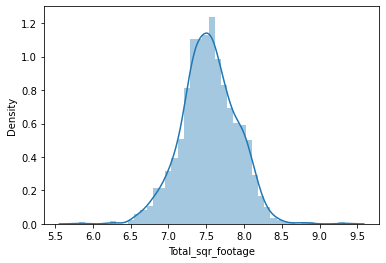

In [242]:
import seaborn as sns
from scipy.stats import skew
sns.distplot(np.log(train_x['Total_sqr_footage']))
skew(np.log(train_x['Total_sqr_footage']))

In [243]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
train_x1=np.log(train_x['Total_sqr_footage'])
train_y1=np.log(train_y)
test_x1=np.log(test_x['Total_sqr_footage'])
test_y1=np.log(test_y)
regressor = LinearRegression()
regressor.fit(train_x1.values.reshape(-1,1), train_y1)
y_pred = regressor.predict(test_x1.values.reshape(-1,1))
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y1, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(test_y1, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y1, y_pred)))
print('R-squared Error:', metrics.r2_score(test_y1.values.reshape(-1,1), y_pred))

Mean Absolute Error: 0.22695339100362982
Mean Squared Error: 0.08080270764968073
Root Mean Squared Error: 0.2842581707703065
R-squared Error: -8.970766414640304
